# Band Pass Filter response Plots

*Schematic*

![low pass filter schematic](https://i.pinimg.com/736x/a7/9c/a5/a79ca5058ebb7a3c328098cbdb6072c9.jpg)

NB: I used RLC bandpass filter instead of the above the schematic

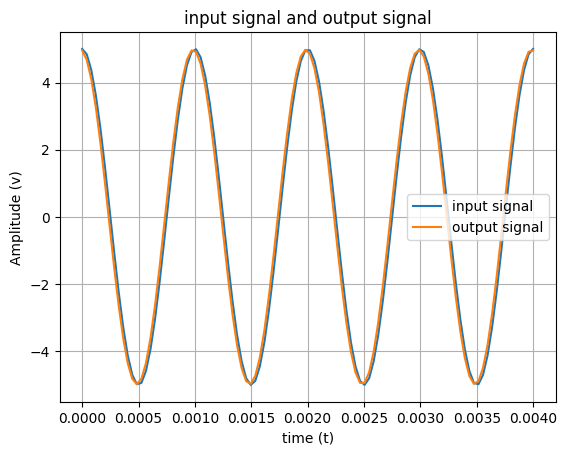

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
R = 1e3        # 1 kOhm
C = 1e-6       # 1 uF
L = 1e-2       # 10 mH
f = 1e3        # 1 kHz
w = 2 * np.pi * f
t=np.linspace(0,0.004,100)
v = 5  
# input voltage in volts
v1=v*np.cos(w*t)
cut_off_frequency=1/(2*np.pi*np.sqrt(L*C))
V2_mag = (w * R * C) / np.sqrt((w * R * C)**2 + (-1 +(w**2) * L * C)**2) * v
theta = -np.arctan((w**2 * L * C - 1) / (w * R * C))
v2=V2_mag*np.cos(w*t+theta)
plt.plot(t,v1,label="input signal")
plt.plot(t,v2,label="output signal")
plt.title("input signal and output signal")
plt.xlabel("time (t)")
plt.ylabel("Amplitude (seconds)")
plt.grid()
plt.legend()
plt.show()


plotting magnitude against angular frequency

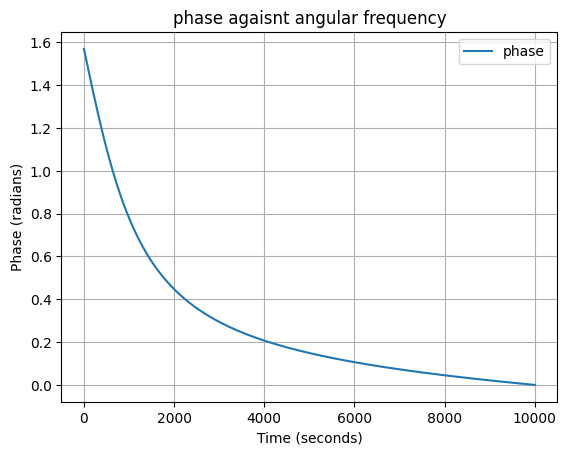

In [12]:
w_range=np.linspace(1,10000,1000)
theta_range= -np.arctan((w_range**2 * L * C - 1) / (w_range * R * C))
plt.plot(w_range,theta_range,label="phase")
plt.title("phase agaisnt angular frequency")
plt.xlabel("Time (seconds)")
plt.ylabel("Phase (radians)")
plt.legend()
plt.grid()
plt.show()


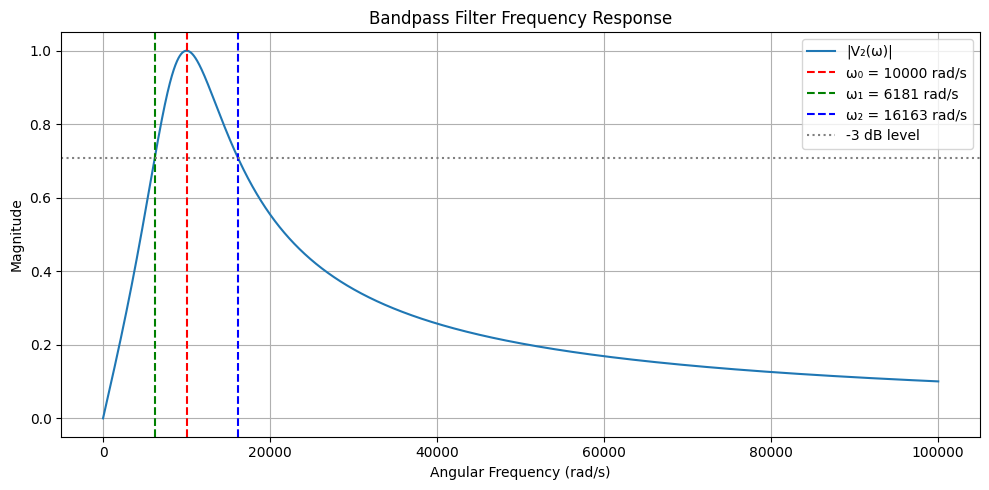

ω₀ (resonant): 10000.00 rad/s
ω₁ (lower -3 dB): 6181.24 rad/s
ω₂ (upper -3 dB): 16163.23 rad/s


In [21]:

w_range = np.linspace(0, 1e5, 5000)

# Transfer function magnitude
numerator = w_range * R * C
denominator = np.sqrt((w_range * R * C)**2 + (-1 + (w_range**2) * L * C)**2)
V2_mag = (numerator / denominator) * v

# Find resonant frequency
w0 = 1 / np.sqrt(L * C)

# Find -3 dB level
peak = np.max(V2_mag)
threshold = peak / np.sqrt(2)  # -3 dB point

# Find cutoff frequencies w1 and w2
indices = np.where(V2_mag >= threshold)[0]
w1 = w_range[indices[0]]
w2 = w_range[indices[-1]]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(w_range, V2_mag, label='|V₂(ω)|')
plt.axvline(x=w0, color="red", linestyle='--', label=f"ω₀ = {w0:.0f} rad/s")
plt.axvline(x=w1, color="green", linestyle='--', label=f"ω₁ = {w1:.0f} rad/s")
plt.axvline(x=w2, color="blue", linestyle='--', label=f"ω₂ = {w2:.0f} rad/s")
plt.axhline(y=threshold, color="gray", linestyle=':', label='-3 dB level')
plt.title("Bandpass Filter Frequency Response")
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print values
print(f"ω₀ (resonant): {w0:.2f} rad/s")
print(f"ω₁ (lower -3 dB): {w1:.2f} rad/s")
print(f"ω₂ (upper -3 dB): {w2:.2f} rad/s")
